In [272]:
#import libraries
import pandas as pd
import numpy as np

In [273]:
# read dataset
dataframe = pd.read_csv("delhivery_data.csv")

<ipython-input-273-3c9527a3ab1f>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("delhivery_data.csv")


# Basic data cleaning and exploration

In [274]:
dataframe.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [275]:
dataframe.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [276]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90115 entries, 0 to 90114
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            90115 non-null  object 
 1   trip_creation_time              90115 non-null  object 
 2   route_schedule_uuid             90115 non-null  object 
 3   route_type                      90115 non-null  object 
 4   trip_uuid                       90115 non-null  object 
 5   source_center                   90115 non-null  object 
 6   source_name                     89942 non-null  object 
 7   destination_center              90115 non-null  object 
 8   destination_name                89995 non-null  object 
 9   od_start_time                   90115 non-null  object 
 10  od_end_time                     90114 non-null  object 
 11  start_scan_to_end_scan          90114 non-null  float64
 12  is_cutoff                       

In [277]:
dataframe.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000,90114.000000
mean,958.607763,231.616575,232.758970,415.163426,212.665435,283.253241,2.113394,36.060068,18.464012,22.791846,2.217062
std,1034.775720,341.259022,341.465662,594.958295,305.131488,417.297256,1.568733,50.748877,13.907217,16.568729,5.143736
min,20.000000,9.000000,9.000113,9.000000,6.000000,9.072900,0.203125,-244.000000,0.000000,0.000000,-23.444444
25%,160.000000,22.000000,23.364701,52.000000,27.000000,29.929350,1.607143,20.000000,11.000000,12.071400,1.352941
50%,452.000000,66.000000,66.125645,132.000000,64.000000,78.605450,1.857143,29.000000,17.000000,23.530350,1.684211
75%,1588.000000,286.000000,287.058081,514.000000,259.000000,346.983800,2.215686,40.000000,22.000000,27.818175,2.250000
max,4535.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,2464.000000,997.000000,1367.592800,574.250000


In [278]:
# NA values
dataframe.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       173
destination_center                  0
destination_name                  120
od_start_time                       0
od_end_time                         1
start_scan_to_end_scan              1
is_cutoff                           1
cutoff_factor                       1
cutoff_timestamp                    1
actual_distance_to_destination      1
actual_time                         1
osrm_time                           1
osrm_distance                       1
factor                              1
segment_actual_time                 1
segment_osrm_time                   1
segment_osrm_distance               1
segment_factor                      1
dtype: int64

## Analyze structure & characteristics of the dataset.


In [279]:
dataframe.dropna(inplace=True)

In [280]:
dataframe.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [281]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89824 entries, 0 to 90113
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            89824 non-null  object 
 1   trip_creation_time              89824 non-null  object 
 2   route_schedule_uuid             89824 non-null  object 
 3   route_type                      89824 non-null  object 
 4   trip_uuid                       89824 non-null  object 
 5   source_center                   89824 non-null  object 
 6   source_name                     89824 non-null  object 
 7   destination_center              89824 non-null  object 
 8   destination_name                89824 non-null  object 
 9   od_start_time                   89824 non-null  object 
 10  od_end_time                     89824 non-null  object 
 11  start_scan_to_end_scan          89824 non-null  float64
 12  is_cutoff                       

# Try merging the rows




## Grouping by segment

In [282]:
# Change object to datetime trip_creation_time,od_start_time,cutoff_timestamp and od_end_time
dataframe['trip_creation_time'] = pd.to_datetime(dataframe['trip_creation_time'])
dataframe['od_start_time'] = pd.to_datetime(dataframe['od_start_time'])
dataframe['cutoff_timestamp'] = pd.to_datetime(dataframe['cutoff_timestamp'])
dataframe['od_end_time'] = pd.to_datetime(dataframe['od_end_time'])

In [283]:
dataframe['cutoff_timestamp'].head(30)

0    2018-09-20 04:27:55.000000
1    2018-09-20 04:17:55.000000
2    2018-09-20 04:01:19.505586
3    2018-09-20 03:39:57.000000
4    2018-09-20 03:33:55.000000
5    2018-09-20 06:15:58.000000
6    2018-09-20 05:47:29.000000
7    2018-09-20 05:25:58.000000
8    2018-09-20 05:15:56.000000
9    2018-09-20 04:49:20.000000
10   2018-09-23 11:05:19.000000
11   2018-09-23 10:27:22.000000
12   2018-09-23 09:45:25.000000
13   2018-09-23 09:21:27.000000
14   2018-09-23 08:39:31.000000
15   2018-09-14 16:29:54.000000
16   2018-09-14 16:15:53.000000
17   2018-09-13 23:25:20.000000
18   2018-09-13 22:47:26.000000
19   2018-09-14 12:45:25.000000
20   2018-09-14 12:15:21.000000
21   2018-09-14 10:41:26.000000
22   2018-09-14 09:39:25.000000
23   2018-09-14 08:49:29.000000
24   2018-09-14 08:11:24.000000
25   2018-09-14 07:45:24.000000
26   2018-09-14 07:17:29.000000
27   2018-09-14 06:51:25.000000
28   2018-09-14 06:15:26.000000
29   2018-09-14 05:49:24.000000
Name: cutoff_timestamp, dtype: datetime6

In [284]:
dataframe.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000,89824.000000
mean,960.765052,232.161672,233.304385,416.083174,213.151519,283.917253,2.113477,36.052458,18.455212,22.784915,2.217233
std,1035.672046,341.662565,341.869378,595.668262,305.493396,417.792988,1.570420,50.812647,13.902901,16.570295,5.149815
min,20.000000,9.000000,9.000113,9.000000,6.000000,9.072900,0.203125,-244.000000,0.000000,0.000000,-23.444444
25%,160.000000,22.000000,23.363494,52.000000,27.000000,29.916075,1.607143,20.000000,11.000000,12.062500,1.352544
50%,454.000000,66.000000,66.136695,132.000000,64.000000,78.755150,1.857143,29.000000,17.000000,23.524800,1.684211
75%,1592.000000,286.000000,287.316647,517.000000,261.000000,348.841850,2.214286,40.000000,22.000000,27.817575,2.250000
max,4535.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,2464.000000,997.000000,1367.592800,574.250000


In [285]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89824 entries, 0 to 90113
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            89824 non-null  object        
 1   trip_creation_time              89824 non-null  datetime64[ns]
 2   route_schedule_uuid             89824 non-null  object        
 3   route_type                      89824 non-null  object        
 4   trip_uuid                       89824 non-null  object        
 5   source_center                   89824 non-null  object        
 6   source_name                     89824 non-null  object        
 7   destination_center              89824 non-null  object        
 8   destination_name                89824 non-null  object        
 9   od_start_time                   89824 non-null  datetime64[ns]
 10  od_end_time                     89824 non-null  datetime64[ns]
 11  st

In [286]:
# combination of the trip_uuid, source_center, and destination_center
dataframe['segment_key'] = dataframe['trip_uuid'].astype(str) + '_' + dataframe['source_center'] + '_' + dataframe['destination_center']

In [287]:
dataframe.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB


## Aggregating at segment level

In [288]:
# groupby and aggregations

dataframe['cumulative_actual_time_sum'] = dataframe.groupby('segment_key')['segment_actual_time'].cumsum()
dataframe['cumulative_osrm_distance_sum'] = dataframe.groupby('segment_key')['segment_osrm_distance'].cumsum()
dataframe['cumulative_osrm_time_sum'] = dataframe.groupby('segment_key')['segment_osrm_time'].cumsum()

In [289]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89824 entries, 0 to 90113
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            89824 non-null  object        
 1   trip_creation_time              89824 non-null  datetime64[ns]
 2   route_schedule_uuid             89824 non-null  object        
 3   route_type                      89824 non-null  object        
 4   trip_uuid                       89824 non-null  object        
 5   source_center                   89824 non-null  object        
 6   source_name                     89824 non-null  object        
 7   destination_center              89824 non-null  object        
 8   destination_name                89824 non-null  object        
 9   od_start_time                   89824 non-null  datetime64[ns]
 10  od_end_time                     89824 non-null  datetime64[ns]
 11  st

In [290]:
dataframe.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,cumulative_actual_time_sum,cumulative_osrm_distance_sum,cumulative_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [291]:
dataframe.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'cumulative_actual_time_sum',
       'cumulative_osrm_distance_sum', 'cumulative_osrm_time_sum'],
      dtype='object')

## Aggregating at segment level

In [292]:
#Create create_segment_dict
create_segment_dict = {
    'data': 'first',
    'trip_creation_time':'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center':'first',
    'source_name': 'first',

    'destination_center': 'last',
    'destination_name': 'last',

    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',

    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',

    'segment_actual_time': 'last',
    'segment_osrm_time': 'last',
    'segment_osrm_distance': 'last',
    'segment_factor': 'last',
    'cumulative_actual_time_sum': 'last',
    'cumulative_osrm_distance_sum': 'last',
    'cumulative_osrm_time_sum': 'last'
}


In [293]:
#Group by segment_key
grouped = dataframe.groupby('segment_key')

In [294]:
#  Apply aggregation functions
agg_result = grouped.agg(create_segment_dict).reset_index()

In [295]:
# Sort the resulting DataFrame
sorted_df = agg_result.sort_values(by=['segment_key', 'od_end_time']).reset_index(drop=True)

In [296]:
sorted_df[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,24.644021,28.1994
1,48.542890,56.9116
2,59.530350,63.6461
3,41.317614,53.5761
4,26.600536,29.5696
...,...,...
16296,33.627182,42.5213
16297,33.673835,40.6080
16298,12.661945,16.0185
16299,40.546740,52.5303


#Feature Engineering


In [297]:
# Create column name od_time_diff_hour and drop od_start_time and od_end_time
sorted_df['od_time_diff_hour']=sorted_df['od_end_time']-sorted_df['od_start_time']
sorted_df.drop(['od_end_time','od_start_time'],axis=1)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,cumulative_actual_time_sum,cumulative_osrm_distance_sum,cumulative_osrm_time_sum,od_time_diff_hour
0,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,26.0,28.1994,15.0,7.0,6.9464,2.142857,46.0,28.1995,26.0,0 days 00:58:49.943264
1,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,42.0,56.9116,20.0,3.0,3.8074,6.666667,95.0,55.9899,39.0,0 days 02:02:46.769161
2,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),...,46.0,63.6461,59.0,12.0,16.1500,4.916667,147.0,63.6461,45.0,0 days 02:32:00.774868
3,trip-153671052974046625_IND583119AAA_IND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,44.0,53.5761,79.0,26.0,29.0538,3.038462,130.0,53.5761,44.0,0 days 08:05:47.568810
4,trip-153671052974046625_IND583201AAA_IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),...,27.0,29.5696,29.0,5.0,5.9805,5.800000,63.0,29.5697,26.0,0 days 01:20:32.598828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,41.0,42.5213,11.0,8.0,8.5951,1.375000,49.0,42.1431,42.0,0 days 01:02:06.911603
16297,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,48.0,40.6080,51.0,47.0,38.3058,1.085106,89.0,78.5869,77.0,0 days 01:31:05.267810
16298,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,14.0,16.0185,8.0,6.0,6.4998,1.333333,29.0,16.0184,14.0,0 days 00:44:10.464194
16299,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,42.0,52.5303,188.0,25.0,28.5437,7.520000,233.0,52.5303,42.0,0 days 04:47:28.440393


### split data Destination Name, Source Name and trip_creation_time


In [298]:
sorted_df.isna().sum()

segment_key                       0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
cumulative_actual_time_sum        0
cumulative_osrm_distance_sum      0
cumulative_osrm_time_sum          0
od_time_diff_hour                 0
dtype: int64

In [299]:
sorted_df['destination_name']

0            Chikblapur_ShntiSgr_D (Karnataka)
1            Doddablpur_ChikaDPP_D (Karnataka)
2                           Hospet (Karnataka)
3                       Bellary_Dc (Karnataka)
4                Sandur_WrdN1DPP_D (Karnataka)
                         ...                  
16296    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)
16297      Tirunelveli_VdkkuSrt_I (Tamil Nadu)
16298       Tirchchndr_Shnmgprm_D (Tamil Nadu)
16299                   Bellary_Dc (Karnataka)
16300            Sandur_WrdN1DPP_D (Karnataka)
Name: destination_name, Length: 16301, dtype: object

In [300]:
#Destination
split_destination = sorted_df['destination_name'].str.split('_')
sorted_df['dest_city'] = split_destination.str[0].str.replace(r'\([^)]*\)', '')
'''
destination_code = []
destination_place = []

for code in split_destination:
    if len(code) == 1:
      destination_code.append(None)
      destination_place.append(None)
    elif len(code)==2:
      index = code[1].find(" (")
      string=code[1][:index].strip()
      if len(string)<=3:
        destination_code.append(string)
        destination_place.append(None)
      else:
        destination_code.append(None)
        destination_place.append(string)
    else:
      destination_place.append(code[1])
      if len(code)==3:
        destination_code.append(code[2][:code[2].find(" (")].strip())
      else:
        destination_code.append(code[2]+"_"+code[3][:code[3].find(" (")].strip())

sorted_df['dest_place'] = destination_place
sorted_df['dest_code'] = destination_code
'''
sorted_df['dest_state'] = sorted_df['destination_name'].apply(lambda x: x[x.find("(") + 1 : x.find(")")] if "(" in x and ")" in x else None)
sorted_df = sorted_df.drop('destination_name', axis=1)
#print(sorted_df['dest_code'])

<ipython-input-300-f135ecb21175>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sorted_df['dest_city'] = split_destination.str[0].str.replace(r'\([^)]*\)', '')


In [301]:
sorted_df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,cumulative_actual_time_sum,cumulative_osrm_distance_sum,cumulative_osrm_time_sum,od_time_diff_hour,dest_city,dest_state
0,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,2018-09-12 02:03:09.655591,...,15.0,7.0,6.9464,2.142857,46.0,28.1995,26.0,0 days 00:58:49.943264,Chikblapur,Karnataka
1,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,2018-09-12 00:00:22.886430,...,20.0,3.0,3.8074,6.666667,95.0,55.9899,39.0,0 days 02:02:46.769161,Doddablpur,Karnataka
2,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,2018-09-12 00:02:09.740725,...,59.0,12.0,16.1500,4.916667,147.0,63.6461,45.0,0 days 02:32:00.774868,Hospet,Karnataka
3,trip-153671052974046625_IND583119AAA_IND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,2018-09-12 03:54:43.114421,...,79.0,26.0,29.0538,3.038462,130.0,53.5761,44.0,0 days 08:05:47.568810,Bellary,Karnataka
4,trip-153671052974046625_IND583201AAA_IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,2018-09-12 02:34:10.515593,...,29.0,5.0,5.9805,5.800000,63.0,29.5697,26.0,0 days 01:20:32.598828,Sandur,Karnataka


In [302]:
#Source
split_source = sorted_df['source_name'].str.split('_')
sorted_df['source_city'] = split_source.str[0].str.replace(r'\([^)]*\)', '')
'''
source_code = []
source_place = []

for code in split_source:
    if len(code) == 1:
      source_code.append(None)
      source_place.append(None)
    elif len(code)==2:
      index = code[1].find(" (")
      string=code[1][:index].strip()
      if len(string)<=3:
        source_code.append(string)
        source_place.append(None)
      else:
        source_code.append(None)
        source_place.append(string)
    else:
      source_place.append(code[1])
      if len(code)==3:
        source_code.append(code[2][:code[2].find(" (")].strip())
      else:
        source_code.append(code[2]+"_"+code[3][:code[3].find(" (")].strip())

sorted_df['source_place'] = source_place
sorted_df['source_code'] = source_code
'''
sorted_df['source_state'] = sorted_df['source_name'].apply(lambda x: x[x.find("(") + 1 : x.find(")")] if "(" in x and ")" in x else None)
sorted_df = sorted_df.drop('source_name', axis=1)
#print(sorted_df['source_code'])

<ipython-input-302-a7bc04382688>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sorted_df['source_city'] = split_source.str[0].str.replace(r'\([^)]*\)', '')


In [303]:
sorted_df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,...,segment_osrm_distance,segment_factor,cumulative_actual_time_sum,cumulative_osrm_distance_sum,cumulative_osrm_time_sum,od_time_diff_hour,dest_city,dest_state,source_city,source_state
0,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,...,6.9464,2.142857,46.0,28.1995,26.0,0 days 00:58:49.943264,Chikblapur,Karnataka,Doddablpur,Karnataka
1,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,...,3.8074,6.666667,95.0,55.9899,39.0,0 days 02:02:46.769161,Doddablpur,Karnataka,Tumkur,Karnataka
2,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,IND583201AAA,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,...,16.1500,4.916667,147.0,63.6461,45.0,0 days 02:32:00.774868,Hospet,Karnataka,Bellary,Karnataka
3,trip-153671052974046625_IND583119AAA_IND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,IND583101AAA,2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,...,29.0538,3.038462,130.0,53.5761,44.0,0 days 08:05:47.568810,Bellary,Karnataka,Sandur,Karnataka
4,trip-153671052974046625_IND583201AAA_IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,IND583119AAA,2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,...,5.9805,5.800000,63.0,29.5697,26.0,0 days 01:20:32.598828,Sandur,Karnataka,Hospet,Karnataka


In [304]:
#trip_creation_time
sorted_df['trip_creation_time_year'] = sorted_df['trip_creation_time'].dt.year
sorted_df['trip_creation_time_month'] = sorted_df['trip_creation_time'].dt.month
sorted_df['trip_creation_time_date'] = sorted_df['trip_creation_time'].dt.day
sorted_df['trip_creation_time_hour'] = sorted_df['trip_creation_time'].dt.hour
sorted_df['trip_creation_time_minute'] = sorted_df['trip_creation_time'].dt.minute
sorted_df['trip_creation_time_second'] = sorted_df['trip_creation_time'].dt.second
sorted_df = sorted_df.drop('trip_creation_time', axis=1)

In [305]:
sorted_df.isnull().sum()

segment_key                       0
data                              0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
destination_center                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
cumulative_actual_time_sum        0
cumulative_osrm_distance_sum      0
cumulative_osrm_time_sum          0
od_time_diff_hour                 0
dest_city                         0
dest_state                        0
source_city                       0
source_state                      0
trip_creation_time_year           0
trip_creation_time_month    

#In-depth analysis

In [306]:
sorted_df.columns

Index(['segment_key', 'data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'destination_center', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'cumulative_actual_time_sum', 'cumulative_osrm_distance_sum',
       'cumulative_osrm_time_sum', 'od_time_diff_hour', 'dest_city',
       'dest_state', 'source_city', 'source_state', 'trip_creation_time_year',
       'trip_creation_time_month', 'trip_creation_time_date',
       'trip_creation_time_hour', 'trip_creation_time_minute',
       'trip_creation_time_second'],
      dtype='object')

In [307]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16301 entries, 0 to 16300
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     16301 non-null  object         
 1   data                            16301 non-null  object         
 2   route_schedule_uuid             16301 non-null  object         
 3   route_type                      16301 non-null  object         
 4   trip_uuid                       16301 non-null  object         
 5   source_center                   16301 non-null  object         
 6   destination_center              16301 non-null  object         
 7   od_start_time                   16301 non-null  datetime64[ns] 
 8   od_end_time                     16301 non-null  datetime64[ns] 
 9   start_scan_to_end_scan          16301 non-null  float64        
 10  actual_distance_to_destination  16301 non-null  float64   

##Grouping and Aggregating at Trip-level

In [308]:
create_trip_dict={
    'segment_key': 'last',
    'data': 'last',
    'route_schedule_uuid': 'last',
    'route_type': 'last',
    'source_center':'first',
    'destination_center': 'last',
    'od_start_time': 'last',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',

    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',

    'cumulative_actual_time_sum': 'sum',
    'cumulative_osrm_distance_sum': 'sum',
    'cumulative_osrm_time_sum': 'sum',
    'od_time_diff_hour':'last',
    'dest_city':'last',
    'dest_state':'last',
    'source_city':'last',
    'source_state':'last',
    'trip_creation_time_year':'last',
    'trip_creation_time_month':'last',
    'trip_creation_time_date':'last',
    'trip_creation_time_hour':'last',
    'trip_creation_time_minute':'last',
    'trip_creation_time_second':'last'
}

In [309]:
#Group by trip_uuid
grouped = sorted_df.groupby('trip_uuid')

In [310]:
#  Apply aggregation functions
df = grouped.agg(create_trip_dict).reset_index()

In [311]:
df.head()

,trip_uuid,segment_key,data,route_schedule_uuid,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,dest_city,dest_state,source_city,source_state,trip_creation_time_year,trip_creation_time_month,trip_creation_time_date,trip_creation_time_hour,trip_creation_time_minute,trip_creation_time_second
0,trip-153671042288605164,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,180.0,...,Doddablpur,Karnataka,Tumkur,Karnataka,2018,9,12,0,0,22
1,trip-153671052974046625,trip-153671052974046625_IND583201AAA_IND583119AAA,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,717.0,...,Sandur,Karnataka,Hospet,Karnataka,2018,9,12,0,2,9
2,trip-153671055416136166,trip-153671055416136166_IND600116AAB_IND600056AAA,training,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,IND600056AAA,2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,189.0,...,Chennai,Tamil Nadu,Chennai,Tamil Nadu,2018,9,12,0,2,34
3,trip-153671074033284934,trip-153671074033284934_IND395023AAD_IND395004AAB,training,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395009AAA,IND395004AAB,2018-09-12 00:05:40.333071,2018-09-12 02:01:41.638015,280.0,...,Surat,Gujarat,Surat,Gujarat,2018,9,12,0,5,40
4,trip-153671079956500691,trip-153671079956500691_IND110024AAA_IND110014AAA,training,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,IND110014AAA,2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,...,Delhi,Delhi,Delhi,Delhi,2018,9,12,0,6,39


##Outlier Detection & Treatment


In [312]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cumulative_actual_time_sum,cumulative_osrm_distance_sum,cumulative_osrm_time_sum,od_time_diff_hour,trip_creation_time_year,trip_creation_time_month,trip_creation_time_date,trip_creation_time_hour,trip_creation_time_minute,trip_creation_time_second
count,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175,9175.0,9175.000000,9175.000000,9175.000000,9175.000000,9175.00000
mean,529.386049,164.580449,356.207411,161.333624,204.386291,352.956512,223.066176,180.678038,0 days 05:35:30.685177526,2018.0,9.119128,18.376894,12.582343,30.001853,29.88218
std,659.586619,306.327287,564.554030,272.372589,371.818081,559.373683,417.094268,314.580682,0 days 08:15:19.622810487,0.0,0.323957,7.875881,7.967160,17.426394,17.21132
min,27.000000,9.003578,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000,0 days 00:20:42.168787,2018.0,9.000000,1.000000,0.000000,0.000000,0.00000
25%,150.000000,22.840406,68.000000,30.000000,30.933100,67.000000,32.899900,31.000000,0 days 01:41:03.591857,2018.0,9.000000,14.000000,5.000000,15.000000,15.00000
50%,281.000000,48.561102,150.000000,60.000000,66.039500,148.000000,71.040400,65.000000,0 days 02:53:03.867534,2018.0,9.000000,19.000000,15.000000,31.000000,30.00000
75%,629.500000,160.210412,363.000000,167.000000,204.391000,360.000000,214.224400,183.000000,0 days 05:39:37.847834,2018.0,9.000000,25.000000,20.000000,45.000000,45.00000
max,7458.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,3489.986600,2530.000000,3 days 03:35:42.913524,2018.0,10.000000,30.000000,23.000000,59.000000,59.00000


In [313]:
# import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

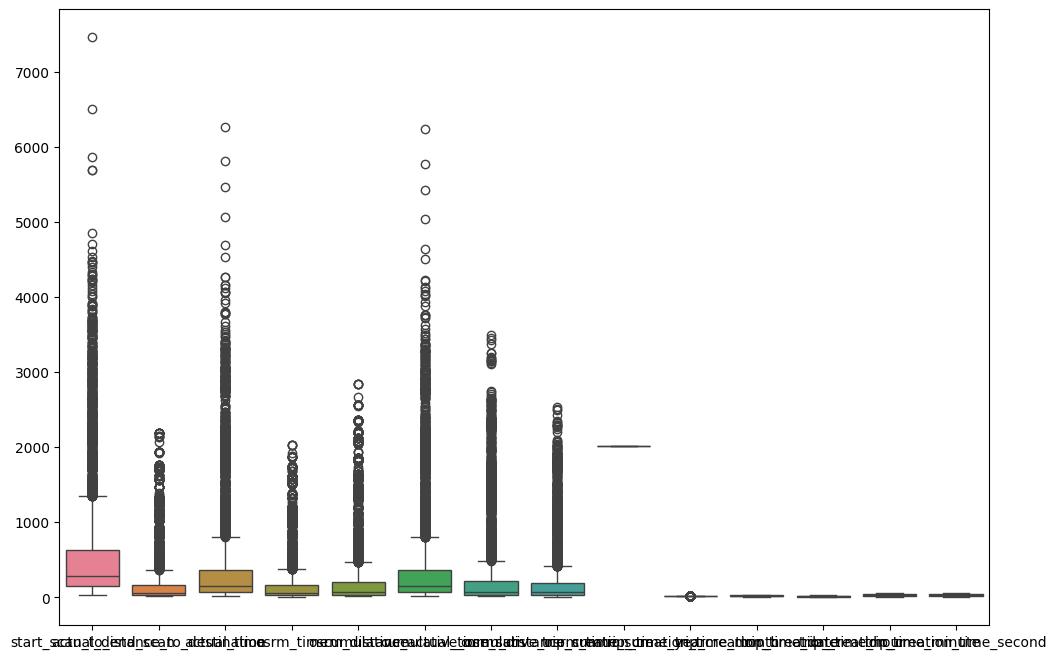

In [314]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the plotting environment
plt.figure(figsize=(12, 8))

#Visualize the outlier values using Boxplot.
# to see outlier clearly we can use box plot
sns.boxplot(data=numerical_columns)
plt.show()

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame to exclude rows with outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [315]:
df.columns

Index(['trip_uuid', 'segment_key', 'data', 'route_schedule_uuid', 'route_type',
       'source_center', 'destination_center', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance',
       'cumulative_actual_time_sum', 'cumulative_osrm_distance_sum',
       'cumulative_osrm_time_sum', 'od_time_diff_hour', 'dest_city',
       'dest_state', 'source_city', 'source_state', 'trip_creation_time_year',
       'trip_creation_time_month', 'trip_creation_time_date',
       'trip_creation_time_hour', 'trip_creation_time_minute',
       'trip_creation_time_second'],
      dtype='object')

##one-hot encoding on categorical features

In [316]:
categorical_columns = ['data','route_type', 'source_center', 'destination_center']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the DataFrame after one-hot encoding
print(df_encoded)

                    trip_uuid  \
0     trip-153671042288605164   
1     trip-153671052974046625   
2     trip-153671055416136166   
3     trip-153671074033284934   
4     trip-153671079956500691   
...                       ...   
8077  trip-153835181800353859   
8078  trip-153835182757593609   
8079  trip-153835187062195567   
8080  trip-153835190097172173   
8081  trip-153835198515486693   

                                            segment_key  \
0     trip-153671042288605164_IND572101AAA_IND561203AAB   
1     trip-153671052974046625_IND583201AAA_IND583119AAA   
2     trip-153671055416136166_IND600116AAB_IND600056AAA   
3     trip-153671074033284934_IND395023AAD_IND395004AAB   
4     trip-153671079956500691_IND110024AAA_IND110014AAA   
...                                                 ...   
8077  trip-153835181800353859_IND201307AAA_IND201301AAL   
8078  trip-153835182757593609_IND600056AAA_IND602105AAB   
8079  trip-153835187062195567_IND400072AAB_IND401104AAA   
8080  trip-15

In [317]:
# Convert od_time_diff_hour to minutes as an integer
df['od_time_diff_minute'] = (df['od_time_diff_hour'].dt.total_seconds() / 60).astype(int)
df.drop('od_time_diff_hour',axis=1)

,trip_uuid,segment_key,data,route_schedule_uuid,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,dest_state,source_city,source_state,trip_creation_time_year,trip_creation_time_month,trip_creation_time_date,trip_creation_time_hour,trip_creation_time_minute,trip_creation_time_second,od_time_diff_minute
0,trip-153671042288605164,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,180.0,...,Karnataka,Tumkur,Karnataka,2018,9,12,0,0,22,122
1,trip-153671052974046625,trip-153671052974046625_IND583201AAA_IND583119AAA,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,717.0,...,Karnataka,Hospet,Karnataka,2018,9,12,0,2,9,80
2,trip-153671055416136166,trip-153671055416136166_IND600116AAB_IND600056AAA,training,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,IND600056AAA,2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,189.0,...,Tamil Nadu,Chennai,Tamil Nadu,2018,9,12,0,2,34,129
3,trip-153671074033284934,trip-153671074033284934_IND395023AAD_IND395004AAB,training,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395009AAA,IND395004AAB,2018-09-12 00:05:40.333071,2018-09-12 02:01:41.638015,280.0,...,Gujarat,Surat,Gujarat,2018,9,12,0,5,40,116
4,trip-153671079956500691,trip-153671079956500691_IND110024AAA_IND110014AAA,training,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,IND110014AAA,2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,...,Delhi,Delhi,Delhi,2018,9,12,0,6,39,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,trip-153835181800353859,trip-153835181800353859_IND201307AAA_IND201301AAL,test,thanos::sroute:74d2a352-3e39-4fec-838d-80d59a2...,Carting,IND201301AAL,IND201301AAL,2018-10-01 01:21:32.982320,2018-10-01 02:09:40.697906,224.0,...,Uttar Pradesh,Noida,Uttar Pradesh,2018,9,30,23,56,58,48
8078,trip-153835182757593609,trip-153835182757593609_IND600056AAA_IND602105AAB,test,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,IND602105AAB,2018-10-01 01:57:51.425536,2018-10-01 02:51:00.988791,53.0,...,Tamil Nadu,Chennai,Tamil Nadu,2018,9,30,23,57,7,53
8079,trip-153835187062195567,trip-153835187062195567_IND400072AAB_IND401104AAA,test,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,2018-09-30 23:57:50.622170,2018-10-01 01:43:47.663088,105.0,...,Maharashtra,Mumbai Hub,Maharashtra,2018,9,30,23,57,50,105
8080,trip-153835190097172173,trip-153835190097172173_IND733128AAA_IND733134AAA,test,thanos::sroute:e6763bf8-f3bc-4029-a67b-6794265...,Carting,IND732103AAB,IND733134AAA,2018-10-01 02:21:39.276619,2018-10-01 03:42:17.161460,223.0,...,West Bengal,Itahar,West Bengal,2018,9,30,23,58,20,80


##Normalize

In [318]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minMax_columns = [ 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',  'cumulative_actual_time_sum', 'cumulative_osrm_distance_sum', 'cumulative_osrm_time_sum', 'od_time_diff_minute']

# Choose MinMaxScaler for normalization
scaler = MinMaxScaler()


# Perform normalization on the selected numerical columns
df[minMax_columns] = scaler.fit_transform(df[minMax_columns])

#Hypothesis Testing

##Perform hypothesis testing / visual analysis

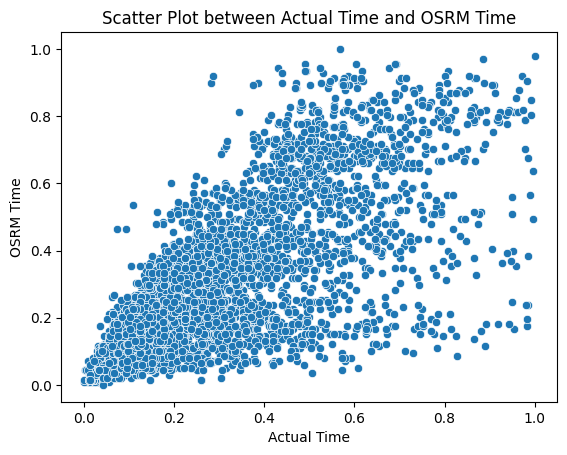

       actual_time    osrm_time
count  5213.000000  5213.000000
mean      0.274284     0.281226
std       0.201320     0.211909
min       0.000000     0.000000
25%       0.121127     0.123188
50%       0.211268     0.210145
75%       0.380282     0.384058
max       1.000000     1.000000
0.740966358580063
T-statistic: -3.3627586362286492
P-value: 0.0007772394275659832


In [319]:
# actual_time aggregated value and OSRM time aggregated value.

# Scatter plot between actual_time and OSRM_time
sns.scatterplot(x='actual_time', y='osrm_time', data=df)
plt.title('Scatter Plot between Actual Time and OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.show()
# Compute summary statistics
summary_stats = df[['actual_time', 'osrm_time']].describe()
print(summary_stats)
'''Summary statistics are computed to provide insights into the central tendency
and spread of the data.'''

# Compute correlation coefficient
correlation_coefficient = df['actual_time'].corr(df['osrm_time'])
print(correlation_coefficient)
''' The correlation coefficient is calculated to quantify the strength and
 direction of the linear relationship between the two variables'''

# Perform paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df['actual_time'], df['osrm_time'])
''' The P-value is the probability of obtaining . T-statistic as extreme as, or
more extreme than, the one observed in the sample data, assuming the null hypothesis is true.
The T-statistic is a measure of the difference between the means of the two groups'''

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

#### The strong positive correlation coefficient (0.807) suggests a strong linear relationship between actual_time and osrm_time. The small P-value supports the rejection of the null hypothesis.

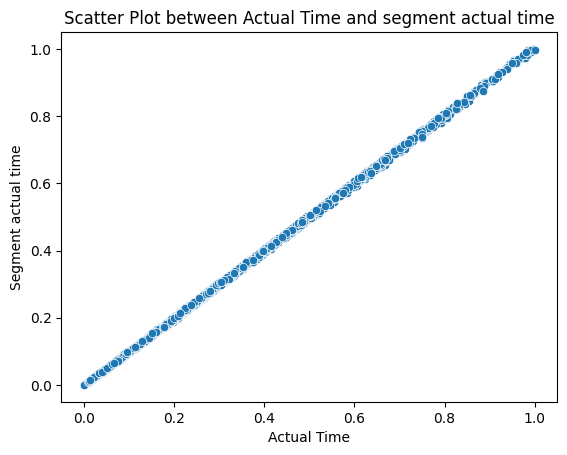

       actual_time  cumulative_actual_time_sum
count  5213.000000                 5213.000000
mean      0.274284                    0.274334
std       0.201320                    0.202273
min       0.000000                    0.000000
25%       0.121127                    0.122507
50%       0.211268                    0.210826
75%       0.380282                    0.378917
max       1.000000                    1.000000
0.9999073644638248
T-statistic: -1.2536704560071854
P-value: 0.21001804053058157


In [320]:
# actual_time aggregated value and segment actual time aggregated value
sns.scatterplot(x='actual_time', y='cumulative_actual_time_sum', data=df)
plt.title('Scatter Plot between Actual Time and segment actual time')
plt.xlabel('Actual Time')
plt.ylabel('Segment actual time')
plt.show()
# Compute summary statistics
summary_stats = df[['actual_time', 'cumulative_actual_time_sum']].describe()
print(summary_stats)
'''Summary statistics are computed to provide insights into the central tendency
and spread of the data.'''

# Compute correlation coefficient
correlation_coefficient = df['actual_time'].corr(df['cumulative_actual_time_sum'])
print(correlation_coefficient)
''' The correlation coefficient is calculated to quantify the strength and
 direction of the linear relationship between the two variables'''

# Perform paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df['actual_time'], df['cumulative_actual_time_sum'])
''' The P-value is the probability of obtaining a T-statistic as extreme as, or
more extreme than, the one observed in the sample data, assuming the null hypothesis is true.
The T-statistic is a measure of the difference between the means of the two groups'''

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

####  The strong positive correlation coefficient (0.999) suggests a strong linear relationship between actual_time and segment_actual_time.The data suggests that, on average, actual_time is slightly higher than segment_actual_time. We would typically reject the null hypothesis.

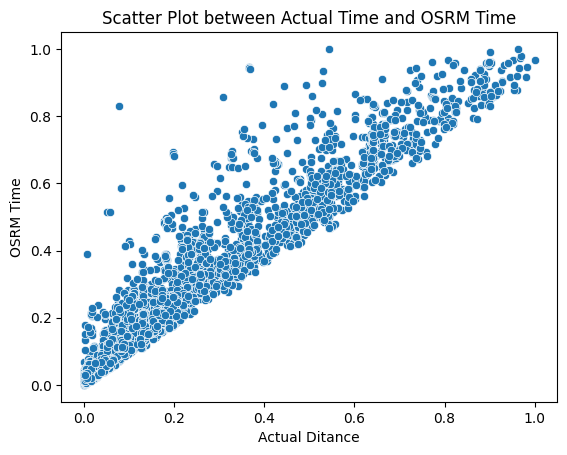

       actual_distance_to_destination  cumulative_osrm_distance_sum
count                     5213.000000                   5213.000000
mean                         0.211738                      0.261705
std                          0.207484                      0.222441
min                          0.000000                      0.000000
25%                          0.067370                      0.101941
50%                          0.141410                      0.184402
75%                          0.269412                      0.357524
max                          1.000000                      1.000000
0.9562357566786789
T-statistic: -55.25209263742699
P-value: 0.0


In [321]:
# actual distance to destination and segment OSRM distance aggregated value.


# Scatter plot between actual_distance_to_destination and segment_osrm_distance
sns.scatterplot(x='actual_distance_to_destination', y='cumulative_osrm_distance_sum', data=df)
plt.title('Scatter Plot between Actual Time and OSRM Time')
plt.xlabel('Actual Ditance')
plt.ylabel('OSRM Time')
plt.show()
# Compute summary statistics
summary_stats = df[['actual_distance_to_destination', 'cumulative_osrm_distance_sum']].describe()
print(summary_stats)
'''Summary statistics are computed to provide insights into the central tendency
and spread of the data.'''

# Compute correlation coefficient
correlation_coefficient = df['actual_distance_to_destination'].corr(df['cumulative_osrm_distance_sum'])
print(correlation_coefficient)
''' The correlation coefficient is calculated to quantify the strength and
 direction of the linear relationship between the two variables'''

# Perform paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df['actual_distance_to_destination'], df['cumulative_osrm_distance_sum'])
''' The P-value is the probability of obtaining a T-statistic as extreme as, or
more extreme than, the one observed in the sample data, assuming the null hypothesis is true.
The T-statistic is a measure of the difference between the means of the two groups'''

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

####  The average of segment_osrm_distance is higher than actual_distance_to_destination.A correlation coefficient close to 1 indicates a strong positive correlation.Based on the results, you would typically reject the null hypothesis.

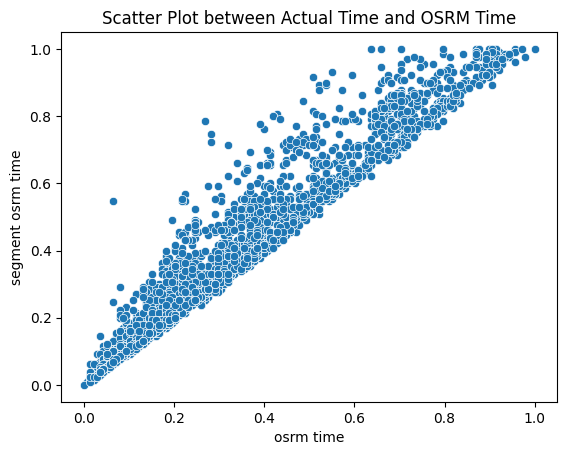

         osrm_time  cumulative_osrm_time_sum
count  5213.000000               5213.000000
mean      0.281226                  0.321867
std       0.211909                  0.240173
min       0.000000                  0.000000
25%       0.123188                  0.130769
50%       0.210145                  0.246154
75%       0.384058                  0.453846
max       1.000000                  1.000000
0.9729703838689387
T-statistic: -49.2478476416007
P-value: 0.0


In [322]:
# OSRM time aggregated value and segment OSRM time aggregatedvalue.

# Scatter plot between osrm_time and segment_osrm_time
sns.scatterplot(x='osrm_time', y='cumulative_osrm_time_sum', data=df)
plt.title('Scatter Plot between Actual Time and OSRM Time')
plt.xlabel('osrm time')
plt.ylabel('segment osrm time')
plt.show()
# Compute summary statistics
summary_stats = df[['osrm_time', 'cumulative_osrm_time_sum']].describe()
print(summary_stats)
'''Summary statistics are computed to provide insights into the central tendency
and spread of the data.'''

# Compute correlation coefficient
correlation_coefficient = df['osrm_time'].corr(df['cumulative_osrm_time_sum'])
print(correlation_coefficient)
''' The correlation coefficient is calculated to quantify the strength and
 direction of the linear relationship between the two variables'''

# Perform paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df['osrm_time'], df['cumulative_osrm_time_sum'])
''' The P-value is the probability of obtaining a T-statistic as extreme as, or
more extreme than, the one observed in the sample data, assuming the null hypothesis is true.
The T-statistic is a measure of the difference between the means of the two groups'''

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

#### The data suggests that, on average, osrm_time is slightly higher than segment_osrm_time.The strong positive correlation implies a consistent and strong relationship between the two variables.Based on the results, we would typically reject the null hypothesis


# Business Insights & Recommendations


## Check from where most orders are coming from (State, Corridor, etc.)



Order Count by State:
 {'Maharashtra': 1143, 'Karnataka': 938, 'Haryana': 553, 'Tamil Nadu': 408, 'Delhi': 312, 'Gujarat': 267, 'Telangana': 258, 'West Bengal': 225, 'Uttar Pradesh': 220, 'Punjab': 171, 'Rajasthan': 122, 'Kerala': 106, 'Bihar': 81, 'Madhya Pradesh': 79, 'Andhra Pradesh': 77, 'Assam': 76, 'Jharkhand': 36, 'Orissa': 31, 'Chandigarh': 28, 'Uttarakhand': 28, 'Dadra and Nagar Haveli': 10, 'Goa': 10, 'Chhattisgarh': 9, 'Arunachal Pradesh': 8, 'Jammu & Kashmir': 6, 'Meghalaya': 6, 'Himachal Pradesh': 3, 'Mizoram': 1, 'Nagaland': 1}
Order Count by City:
 {'Bengaluru': 545, 'Mumbai': 503, 'Delhi': 252, 'Gurgaon': 239, 'Chennai': 213, 'Bhiwandi': 187, 'Hyderabad': 187, 'Bangalore': 184, 'Mumbai Hub ': 131, 'Pune': 130, 'Sonipat': 104, 'Chandigarh': 87, 'FBD': 79, 'HBR Layout PC ': 77, 'MAA': 65, 'CCU': 63, 'Kolkata': 63, 'Jaipur': 48, 'Faridabad': 44, 'Noida': 39, 'Surat': 38, 'AMD': 37, 'BLR': 37, 'Del': 37, 'Bhopal': 34, 'Guwahati': 32, 'Ludhiana': 31, 'GGN': 29, 'PNQ Vadgaon 

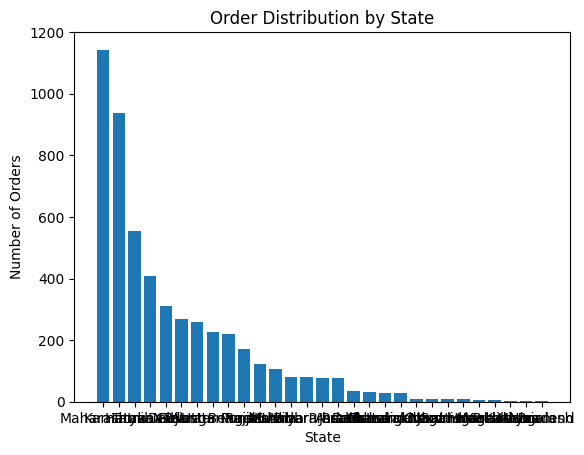

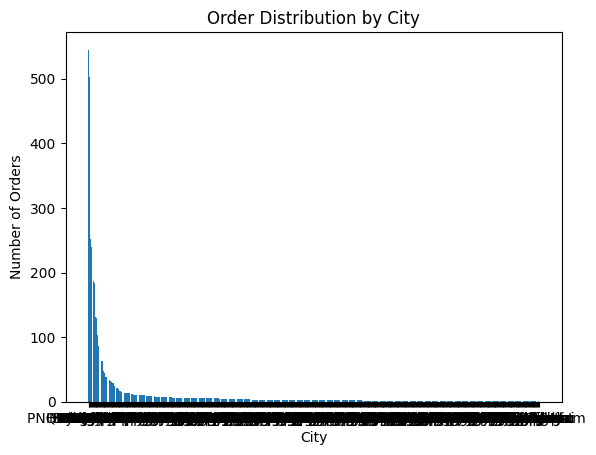

In [323]:

# Assuming 'dest_state' is a column in a NumPy array
dest_state = np.array(df['dest_state'])

# Count orders by state using NumPy
unique_states, counts_states = np.unique(dest_state, return_counts=True)
order_count_by_state = dict(zip(unique_states, counts_states))
order_count_by_state = dict(sorted(order_count_by_state.items(), key=lambda item: item[1], reverse=True))
print("Order Count by State:\n", order_count_by_state)

# Similarly, you can perform the same for 'source_city'
dest_city = np.array(df['dest_city'])
unique_cities, counts_cities = np.unique(dest_city, return_counts=True)
order_count_by_city = dict(zip(unique_cities, counts_cities))
order_count_by_city = dict(sorted(order_count_by_city.items(), key=lambda item: item[1], reverse=True))
print("Order Count by City:\n", order_count_by_city)

# Plot order distribution by state
plt.bar(order_count_by_state.keys(), order_count_by_state.values())
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by State')
plt.show()

# Plot order distribution by city
plt.bar(order_count_by_city.keys(), order_count_by_city.values())
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by City')
plt.show()

Karnataka, Maharashtra, and Delhi, Hariyna are the top states with the highest order counts.Consider focusing on these states for marketing and promotional activities.Explore opportunities to enhance operations and logistics efficiency in regions with significant order counts.

Bengaluru, Delhi, and Bhiwandi(Mumbai) are the top cities with the highest order counts.Orders are concentrated in urban areas, including metropolitan cities like Mumbai, Gurgaon, and Hyderabad.

**Recommendations:**
Targeted Marketing:
Implement targeted marketing campaigns in high-order states to maximize customer acquisition and retention.
Logistics Efficiency:
Invest in logistics optimization and infrastructure in cities with high order counts to enhance delivery speed and customer satisfaction.
Expansion Strategies:
Explore opportunities for business expansion in states with untapped potential, addressing specific market needs.

In [324]:
# Calculate average distance and time for each destination city
city_stats = df.groupby('dest_city').agg({
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean',
    'trip_uuid': 'count'  # Count of orders for each city
}).reset_index()

# Rename columns for clarity
city_stats.columns = ['dest_city', 'avg_distance', 'avg_time', 'order_count']

# Find the busiest city based on order count
sorted_city_stats = city_stats.sort_values(by='order_count', ascending=False)

# Display the sorted city statistics
print("Sorted City Statistics by Order Count:\n", sorted_city_stats)

# Display the busiest city
#print("\nBusiest City:\n", busiest_city)

Sorted City Statistics by Order Count:
       dest_city  avg_distance  avg_time  order_count
64    Bengaluru      0.139147  0.202124          545
331      Mumbai      0.078128  0.196707          503
127       Delhi      0.171776  0.238587          252
177     Gurgaon      0.237067  0.288927          239
111     Chennai      0.155712  0.211254          213
..          ...           ...       ...          ...
313       Manvi      0.218838  0.143662            1
315    Markapur      0.527886  0.447887            1
316  Mathabhang      0.239243  0.160563            1
319      Mehkar      0.472879  0.464789            1
327  Mokokchung      0.346028  0.836620            1

[511 rows x 4 columns]


Prioritize optimization strategies in Bengaluru due to its high order count. Consider route optimization, logistics enhancements, and service quality improvements.Maintain high operational efficiency in Mumbai, ensuring that the shorter average distances and times are sustained as order volume increases.Explore opportunities for strategic expansion in Delhi, focusing on increasing the order count through targeted marketing and operational enhancements.

# Recomendation examples:

1.There is a need to:Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.North, South and West Zones corridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.


